In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import sgd


from keras.datasets import cifar10

In [11]:
#Loading Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

array([3], dtype=uint8)

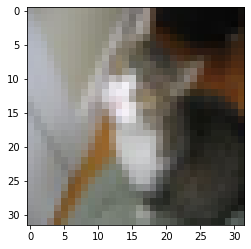

In [12]:
#Vizualizing
plt.imshow(x_train[101]),
y_train[101]

In [13]:
#PreProcessing
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

#One Hot encoding

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [14]:
#Building Model

model=Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(32,32,3)))
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(10,activation='softmax'))


model.summary()  
"""
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
"""

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)        

"\nmodel=Sequential()\nmodel.add(layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))\nmodel.add(layers.MaxPooling2D((2,2)))\nmodel.add(layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))\nmodel.add(layers.MaxPooling2D(2,2))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))\nmodel.add(layers.Dense(10,activation='softmax'))\nmodel.summary()\n"

In [15]:
datagen = ImageDataGenerator(zca_whitening=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)

opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,epochs=20,validation_data=(x_test,y_test))

C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
782/782 [==============================] - 49s 63ms/step - loss: 1.9904 - accuracy: 0.2676 - val_loss: 1.7482 - val_accuracy: 0.3829
Epoch 2/20
782/782 [==============================] - 51s 65ms/step - loss: 1.6764 - accuracy: 0.3864 - val_loss: 1.5887 - val_accuracy: 0.4508
Epoch 3/20
782/782 [==============================] - 51s 65ms/step - loss: 1.5542 - accuracy: 0.4336 - val_loss: 1.4953 - val_accuracy: 0.4855
Epoch 4/20
782/782 [==============================] - 51s 65ms/step - loss: 1.4755 - accuracy: 0.4645 - val_loss: 1.4177 - val_accuracy: 0.5109
Epoch 5/20
782/782 [==============================] - 54s 69ms/step - loss: 1.4118 - accuracy: 0.4905 - val_loss: 1.3585 - val_accuracy: 0.5303
Epoch 6/20
782/782 [==============================] - 51s 65ms/step - loss: 1.3601 - accuracy: 0.5111 - val_loss: 1.3180 - val_accuracy: 0.5382
Epoch 7/20
782/782 [==============================] - 51s 65ms/step - loss: 1.3179 - accuracy: 0.5271 - val_loss: 1.2860 - val_accuracy:

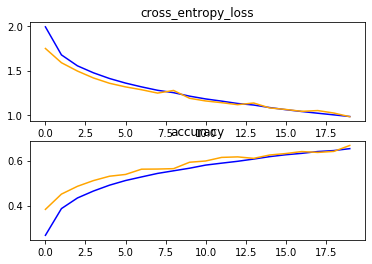

In [16]:
def summary_dignostic(history):
    plt.subplot(211)
    plt.title("cross_entropy_loss")
    plt.plot(history.history['loss'],color='blue',label='train_loss')
    plt.plot(history.history['val_loss'],color='orange',label='val_loss')
    plt.subplot(212)
    plt.title("accuracy")
    plt.plot(history.history['accuracy'],color='blue',label='train')
    plt.plot(history.history['val_accuracy'],color='orange',label='test')
    #filename=sys.argv[0].split('/')[-1]
    #plt.savefig(filename+'_plot.png')
    #plt.close()
    
summary_dignostic(history)    

# part 2

In [17]:
#Reshaping Y
y_train=y_train.reshape(50000,1,1,10)
y_test=y_test.reshape(10000,1,1,10)


In [18]:
#model

model=Sequential()

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.MaxPooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(64,(4,4),activation='relu',kernel_initializer='he_uniform'))

model.add(layers.Conv2D(10,(1,1),activation='softmax',kernel_initializer='he_uniform'))



model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 17, 17, 32)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)        

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
782/782 [==============================] - 72s 92ms/step - loss: 2.2502 - accuracy: 0.1716 - val_loss: 2.1865 - val_accuracy: 0.2165
Epoch 2/20
782/782 [==============================] - 73s 94ms/step - loss: 2.1121 - accuracy: 0.2380 - val_loss: 2.0441 - val_accuracy: 0.2648
Epoch 3/20
782/782 [==============================] - 73s 94ms/step - loss: 2.0012 - accuracy: 0.2789 - val_loss: 1.9650 - val_accuracy: 0.2880
Epoch 4/20
782/782 [==============================] - 74s 94ms/step - loss: 1.9346 - accuracy: 0.3075 - val_loss: 1.8944 - val_accuracy: 0.3350
Epoch 5/20
782/782 [==============================] - 75s 95ms/step - loss: 1.8597 - accuracy: 0.3383 - val_loss: 1.8161 - val_accuracy: 0.3594
Epoch 6/20
782/782 [==============================] - 74s 95ms/step - loss: 1.7851 - accuracy: 0.3667 - val_loss: 1.7498 - val_accuracy: 0.3819
Epoch 7/20
782/782 [==============================] - 75s 95ms/step - loss: 1.7304 - accuracy: 0.3859 - val_loss: 1.6961 - val_accuracy:

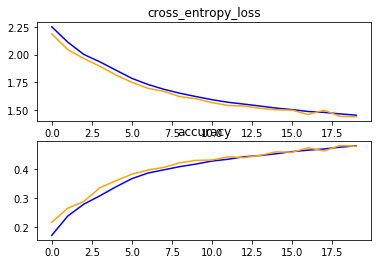

In [19]:
datagen = ImageDataGenerator(zca_whitening=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)

opt=sgd(learning_rate=.0009)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

Epoch 1/20
782/782 [==============================] - 75s 96ms/step - loss: 1.4799 - accuracy: 0.4674 - val_loss: 1.4419 - val_accuracy: 0.4856
Epoch 2/20
782/782 [==============================] - 75s 96ms/step - loss: 1.3831 - accuracy: 0.5059 - val_loss: 1.3372 - val_accuracy: 0.5238
Epoch 3/20
782/782 [==============================] - 74s 95ms/step - loss: 1.3076 - accuracy: 0.5335 - val_loss: 1.2523 - val_accuracy: 0.5515
Epoch 4/20
782/782 [==============================] - 74s 95ms/step - loss: 1.2434 - accuracy: 0.5605 - val_loss: 1.2129 - val_accuracy: 0.5741
Epoch 5/20
782/782 [==============================] - 75s 96ms/step - loss: 1.1861 - accuracy: 0.5823 - val_loss: 1.1482 - val_accuracy: 0.5932
Epoch 6/20
782/782 [==============================] - 75s 96ms/step - loss: 1.1416 - accuracy: 0.5968 - val_loss: 1.0942 - val_accuracy: 0.6164
Epoch 7/20
782/782 [==============================] - 75s 97ms/step - loss: 1.1023 - accuracy: 0.6103 - val_loss: 1.1152 - val_accuracy:

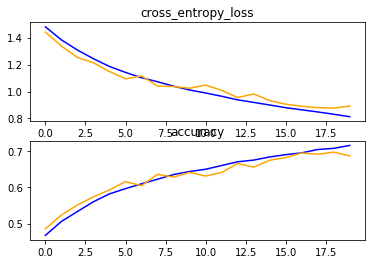

In [20]:
#Adding Momentumn
datagen = ImageDataGenerator(zca_whitening=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)


opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

In [23]:
#Adding Dropout layer

#model

model=Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.MaxPooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(64,(4,4),activation='relu',kernel_initializer='he_uniform'))

model.add(layers.Conv2D(10,(1,1),activation='softmax',kernel_initializer='he_uniform'))



model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 17, 17, 32)        0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 8, 8, 32)         

C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ayush\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
782/782 [==============================] - 79s 101ms/step - loss: 1.9882 - accuracy: 0.2653 - val_loss: 1.7032 - val_accuracy: 0.3914
Epoch 2/20
782/782 [==============================] - 80s 102ms/step - loss: 1.6671 - accuracy: 0.3945 - val_loss: 1.5434 - val_accuracy: 0.4365
Epoch 3/20
782/782 [==============================] - 80s 102ms/step - loss: 1.5378 - accuracy: 0.4393 - val_loss: 1.4480 - val_accuracy: 0.4700
Epoch 4/20
782/782 [==============================] - 80s 103ms/step - loss: 1.4595 - accuracy: 0.4734 - val_loss: 1.4029 - val_accuracy: 0.4843
Epoch 5/20
782/782 [==============================] - 80s 102ms/step - loss: 1.3907 - accuracy: 0.4981 - val_loss: 1.3057 - val_accuracy: 0.5340
Epoch 6/20
782/782 [==============================] - 80s 102ms/step - loss: 1.3345 - accuracy: 0.5227 - val_loss: 1.2515 - val_accuracy: 0.5472
Epoch 7/20
782/782 [==============================] - 81s 104ms/step - loss: 1.2853 - accuracy: 0.5397 - val_loss: 1.2091 - val_ac

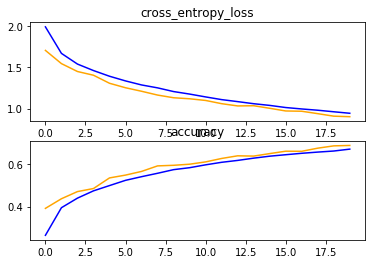

In [24]:
datagen = ImageDataGenerator(zca_whitening=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)

opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

In [25]:
#Weight Decay
#model
from keras.regularizers import l2


model=Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3),kernel_regularizer=l2(0.01)))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.MaxPooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(64,(4,4),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))

model.add(layers.Conv2D(10,(1,1),activation='softmax',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 17, 17, 32)        0         
_________________________________________________________________
average_pooling2d_7 (Average (None, 8, 8, 32)         

Epoch 1/20
782/782 [==============================] - 95s 122ms/step - loss: 5.5775 - accuracy: 0.2576 - val_loss: 4.8982 - val_accuracy: 0.3659
Epoch 2/20
782/782 [==============================] - 95s 121ms/step - loss: 4.4669 - accuracy: 0.3723 - val_loss: 4.0972 - val_accuracy: 0.3877
Epoch 3/20
782/782 [==============================] - 92s 118ms/step - loss: 3.7569 - accuracy: 0.4046 - val_loss: 3.4363 - val_accuracy: 0.4266
Epoch 4/20
782/782 [==============================] - 89s 114ms/step - loss: 3.2401 - accuracy: 0.4249 - val_loss: 2.9793 - val_accuracy: 0.4497
Epoch 5/20
782/782 [==============================] - 88s 113ms/step - loss: 2.8475 - accuracy: 0.4395 - val_loss: 2.6639 - val_accuracy: 0.4549
Epoch 6/20
782/782 [==============================] - 88s 113ms/step - loss: 2.5638 - accuracy: 0.4475 - val_loss: 2.4139 - val_accuracy: 0.4574
Epoch 7/20
782/782 [==============================] - 89s 114ms/step - loss: 2.3477 - accuracy: 0.4525 - val_loss: 2.2703 - val_ac

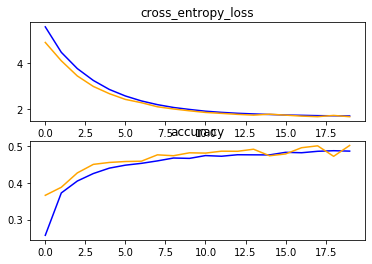

In [26]:
datagen = ImageDataGenerator(zca_whitening=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)

opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

# Data Augmentation

Epoch 1/20
782/781 [==============================] - 101s 129ms/step - loss: 1.7541 - accuracy: 0.4643 - val_loss: 1.6494 - val_accuracy: 0.5030
Epoch 2/20
782/781 [==============================] - 98s 126ms/step - loss: 1.7468 - accuracy: 0.4641 - val_loss: 1.6711 - val_accuracy: 0.4989
Epoch 3/20
782/781 [==============================] - 99s 127ms/step - loss: 1.7397 - accuracy: 0.4612 - val_loss: 1.7091 - val_accuracy: 0.4645
Epoch 4/20
782/781 [==============================] - 94s 120ms/step - loss: 1.7391 - accuracy: 0.4638 - val_loss: 1.6606 - val_accuracy: 0.4879
Epoch 5/20
782/781 [==============================] - 95s 121ms/step - loss: 1.7342 - accuracy: 0.4633 - val_loss: 1.6613 - val_accuracy: 0.4935
Epoch 6/20
782/781 [==============================] - 98s 126ms/step - loss: 1.7331 - accuracy: 0.4636 - val_loss: 1.6675 - val_accuracy: 0.4875
Epoch 7/20
782/781 [==============================] - 95s 121ms/step - loss: 1.7307 - accuracy: 0.4621 - val_loss: 1.7307 - val_a

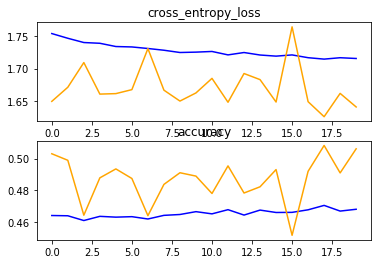

In [27]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)


opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,steps_per_epoch=50000/64,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

# Adding Batch Normalization


In [28]:
#Batch Normalization

model=Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3),kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.MaxPooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))

model.add(layers.Conv2D(64,(4,4),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))

model.add(layers.Conv2D(10,(1,1),activation='softmax',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))



model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)       

Epoch 1/20
782/781 [==============================] - 177s 226ms/step - loss: 5.1895 - accuracy: 0.3999 - val_loss: 4.4538 - val_accuracy: 0.4904
Epoch 2/20
782/781 [==============================] - 178s 227ms/step - loss: 4.0509 - accuracy: 0.5098 - val_loss: 3.6490 - val_accuracy: 0.5234
Epoch 3/20
782/781 [==============================] - 176s 225ms/step - loss: 3.3006 - accuracy: 0.5587 - val_loss: 3.5095 - val_accuracy: 0.4504
Epoch 4/20
782/781 [==============================] - 180s 230ms/step - loss: 2.7516 - accuracy: 0.5895 - val_loss: 2.5967 - val_accuracy: 0.5811
Epoch 5/20
782/781 [==============================] - 185s 237ms/step - loss: 2.3362 - accuracy: 0.6153 - val_loss: 2.4829 - val_accuracy: 0.5460
Epoch 6/20
782/781 [==============================] - 184s 235ms/step - loss: 2.0278 - accuracy: 0.6316 - val_loss: 1.9730 - val_accuracy: 0.6120
Epoch 7/20
782/781 [==============================] - 182s 233ms/step - loss: 1.7898 - accuracy: 0.6495 - val_loss: 1.7545 -

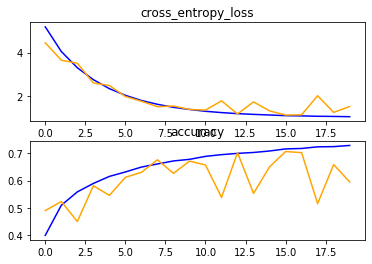

In [29]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)


opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,steps_per_epoch=50000/64,epochs=20,validation_data=(x_test,y_test))

summary_dignostic(history)  

In [31]:
# Sequnentially Increasing Dropout
model=Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3),kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.MaxPooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.2))

model.add(layers.Conv2D(32,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.25))

model.add(layers.Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.ZeroPadding2D(padding=((0,1),(0,1))))
model.add(layers.AveragePooling2D((3,3),strides=(2,2)))
model.add(layers.Dropout(.30))

model.add(layers.Conv2D(64,(4,4),activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(.35))

model.add(layers.Conv2D(10,(1,1),activation='softmax',kernel_initializer='he_uniform',kernel_regularizer=l2(0.01)))



model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 33, 33, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)      

Epoch 1/20
782/781 [==============================] - 159s 204ms/step - loss: 5.3618 - accuracy: 0.3296 - val_loss: 4.8662 - val_accuracy: 0.3477
Epoch 2/20
782/781 [==============================] - 159s 204ms/step - loss: 4.2033 - accuracy: 0.4319 - val_loss: 4.0148 - val_accuracy: 0.3909
Epoch 3/20
782/781 [==============================] - 158s 202ms/step - loss: 3.4343 - accuracy: 0.4910 - val_loss: 3.2363 - val_accuracy: 0.4833
Epoch 4/20
782/781 [==============================] - 159s 203ms/step - loss: 2.8855 - accuracy: 0.5254 - val_loss: 2.7084 - val_accuracy: 0.5182
Epoch 5/20
782/781 [==============================] - 159s 204ms/step - loss: 2.4733 - accuracy: 0.5449 - val_loss: 2.4117 - val_accuracy: 0.5057
Epoch 6/20
782/781 [==============================] - 161s 206ms/step - loss: 2.1597 - accuracy: 0.5685 - val_loss: 2.2369 - val_accuracy: 0.4878
Epoch 7/20
782/781 [==============================] - 159s 203ms/step - loss: 1.9275 - accuracy: 0.5865 - val_loss: 3.0863 -

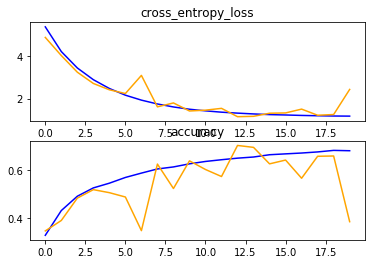

In [32]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)


opt=sgd(learning_rate=.0009,momentum=.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(it_train,steps_per_epoch=50000/64,epochs=20,validation_data=(x_test,y_test))


summary_dignostic(history)  